In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as matcolors
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go


In [2]:
to_drop = ['educ1989', 'educflag', 'ageflag', 'age', 'ager52', 
           'ager12', 'ager22', 'eanum', 'brace', 'raceimp', 'racer3', 
           'racer5', 'hispanic', 'hspanicr', 'ucr358', 'ucr130', 'ucr39', 'econdp_1',
            'econds_1', 'enicon_1', 'econdp_2', 'econds_2', 'enicon_2', 'econdp_3',
            'econds_3', 'enicon_3', 'econdp_4', 'econds_4', 'enicon_4', 'econdp_5',
            'econds_5', 'enicon_5', 'econdp_6', 'econds_6', 'enicon_6', 'econdp_7', 'econds_7',
            'enicon_7', 'econdp_8', 'econds_8', 'enicon_8', 'econdp_9', 'econds_9',
            'enicon_9', 'econdp_10', 'econds_10', 'enicon_10', 'econdp_11', 'econds_11', 'enicon_11',
            'econdp_12', 'econds_12', 'enicon_12', 'econdp_13', 'econds_13', 'enicon_13',
            'econdp_14', 'econds_14', 'enicon_14', 'econdp_15', 'econds_15', 'enicon_15',
            'econdp_16', 'econds_16', 'enicon_16', 'econdp_17', 'econds_17', 'enicon_17',
            'econdp_18', 'econds_18', 'enicon_18', 'econdp_19', 'econds_19', 'enicon_19', 'econdp_20',
            'econds_20', 'enicon_20']

In [3]:
main_df = pd.DataFrame()

In [4]:
def clean_mort_file(file_path): 
    df = pd.read_csv(file_path)
    df.drop(columns=to_drop, inplace=True)
    df = df[df['ucod'].str.startswith('O')]
    return df

In [5]:
files_list = ['data/mort2009.csv', 'data/mort2010.csv', 
             'data/mort2011.csv', 'data/mort2012.csv', 
             'data/mort2013.csv', 'data/mort2014.csv', 
             'data/mort2015.csv', 'data/mort2016.csv', 
             'data/mort2017.csv', 'data/Mort2018US.PubUse.csv']

In [6]:
for file in files_list: 
    df = clean_mort_file(file)
    main_df = main_df.append(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (63,66,69,72,75,78,81,84,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (63,66,69,72,75,78,81,84,99,100,101,102,103,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (60,63,66,69,72,99,100,101,102,103,104,105) have mixed types.Specify dtype option on import or set low_memory=False.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 2113 to 2844169
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   restatus   10561 non-null  int64  
 1   educ2003   9840 non-null   float64
 2   monthdth   10561 non-null  int64  
 3   sex        10561 non-null  object 
 4   ager27     10561 non-null  int64  
 5   placdth    10561 non-null  int64  
 6   marstat    10561 non-null  object 
 7   weekday    10561 non-null  int64  
 8   year       10561 non-null  int64  
 9   injwork    10561 non-null  object 
 10  mandeath   9693 non-null   float64
 11  methdisp   10561 non-null  object 
 12  autopsy    10561 non-null  object 
 13  activity   10 non-null     float64
 14  injury     297 non-null    float64
 15  ucod       10561 non-null  object 
 16  ucr113     10561 non-null  int64  
 17  ranum      10561 non-null  int64  
 18  record_1   10561 non-null  object 
 19  record_2   3990 non-null   object 
 20  r

In [8]:
percent_missing = main_df.isnull().sum() * 100 / len(main_df)
missing_value_df = pd.DataFrame({'column_name': main_df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df

,column_name,percent_missing
restatus,restatus,0.000000
educ2003,educ2003,6.827005
monthdth,monthdth,0.000000
sex,sex,0.000000
ager27,ager27,0.000000
placdth,placdth,0.000000
marstat,marstat,0.000000
weekday,weekday,0.000000
year,year,0.000000
injwork,injwork,0.000000


In [10]:
to_drop = ['record_6', 'record_7', 'record_8', 'record_9', 'record_10', 'record_11', 'record_12', 
          'record_13', 'record_14', 'record_15', 'record_16', 'record_17', 'record_18', 
          'record_19', 'record_20', 'activity', 'injury']

In [11]:
main_df.drop(to_drop, inplace=True, axis=1)

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 2113 to 2844169
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   restatus  10561 non-null  int64  
 1   educ2003  9840 non-null   float64
 2   monthdth  10561 non-null  int64  
 3   sex       10561 non-null  object 
 4   ager27    10561 non-null  int64  
 5   placdth   10561 non-null  int64  
 6   marstat   10561 non-null  object 
 7   weekday   10561 non-null  int64  
 8   year      10561 non-null  int64  
 9   injwork   10561 non-null  object 
 10  mandeath  9693 non-null   float64
 11  methdisp  10561 non-null  object 
 12  autopsy   10561 non-null  object 
 13  ucod      10561 non-null  object 
 14  ucr113    10561 non-null  int64  
 15  ranum     10561 non-null  int64  
 16  record_1  10561 non-null  object 
 17  record_2  3990 non-null   object 
 18  record_3  1564 non-null   object 
 19  record_4  671 non-null    object 
 20  record_5  286 non-null 

In [13]:
main_df.reset_index(inplace=True)

In [14]:
df = main_df.copy()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9113 entries, 6 to 10560
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     9113 non-null   int64  
 1   restatus  9113 non-null   int64  
 2   educ2003  9113 non-null   float64
 3   monthdth  9113 non-null   int64  
 4   sex       9113 non-null   object 
 5   ager27    9113 non-null   int64  
 6   placdth   9113 non-null   int64  
 7   marstat   9113 non-null   object 
 8   weekday   9113 non-null   int64  
 9   year      9113 non-null   int64  
 10  injwork   9113 non-null   object 
 11  mandeath  9113 non-null   float64
 12  methdisp  9113 non-null   object 
 13  autopsy   9113 non-null   object 
 14  ucod      9113 non-null   object 
 15  ucr113    9113 non-null   int64  
 16  ranum     9113 non-null   int64  
 17  record_1  9113 non-null   object 
 18  record_2  9113 non-null   object 
 19  record_3  9113 non-null   object 
 20  record_4  9113 non-null   obj

In [16]:
df.record_2.fillna(value='None', inplace=True)

In [17]:
df.record_3.fillna(value='None', inplace=True)

In [18]:
df.record_4.fillna(value='None', inplace=True)

In [19]:
df.record_5.fillna(value='None', inplace=True)

In [244]:
df_list = [df1, df2, df3, df4, df5]

In [516]:
from itertools import chain


In [524]:
def create_sankey_df(df): 
    san = pd.DataFrame(columns=['source', 'target', 'value'])
    top_5 = df.record_1.value_counts(normalize=True)[:5]
    df1 = df[df['record_1']==top_5_all.index[0]]
    df2 = df[df['record_1']==top_5_all.index[1]]
    df3 = df[df['record_1']==top_5_all.index[2]]
    df4 = df[df['record_1']==top_5_all.index[3]]
    df5 = df[df['record_1']==top_5_all.index[4]]
    list_of_dfs = [df1, df2, df3, df4, df5]
    list_of_top_5 = top_5.index
    list_of_causes = []
    list_of_causes.append(list_of_top_5.tolist())
    for idx, df in enumerate(list_of_dfs): 
        top = df.record_2.value_counts(normalize=True)[:5]
        list_of_causes.append(top.index.tolist())
        for i in range(5): 
            san = san.append({'source': list_of_top_5[idx], 'target': top.index[i], 'value': top[i]}, ignore_index=True)
    list_of_causes = list(set(list(chain.from_iterable(list_of_causes))))
    return san, list_of_causes

In [525]:
san, list_of_causes_all = create_sankey_df(df)

In [527]:
san, list_of_causes_all

(   source target     value
 0    O268   None  0.648949
 1    O268   O266  0.019860
 2    O268   O100  0.017523
 3    O268   O882  0.016355
 4    O268   O881  0.016355
 5    O998   None  0.556938
 6    O998   O994  0.140670
 7    O998   O993  0.064115
 8    O998   O988  0.056459
 9    O998   O995  0.037321
 10   O961   None  0.769397
 11   O961    R99  0.010776
 12   O961   O268  0.009698
 13   O961   T509  0.006466
 14   O961   I219  0.005388
 15   O960   None  0.694408
 16   O960   O961  0.115735
 17   O960    R99  0.016905
 18   O960   C509  0.007802
 19   O960   I269  0.006502
 20   O994   None  0.840604
 21   O994    R99  0.023490
 22   O994   O998  0.013423
 23   O994   O988  0.010067
 24   O994   I499  0.006711,
 ['O881',
  'C509',
  'None',
  'O268',
  'R99',
  'O960',
  'O995',
  'I499',
  'O998',
  'O961',
  'O266',
  'O994',
  'I219',
  'I269',
  'O100',
  'O882',
  'T509',
  'O993',
  'O988'])

In [530]:
# create a dictionary for the causes involved in this chart

causes_all_dict = {'O881': 'O881: Amniotic Fluid Embolism',
                   'C509': 'C509: Breast Neoplasm, Unspecified',
                   'None': 'No Secondary Cause Reported',
                   'O268': 'O268: Other Specified Pregnancy-Related Conditions',
                   'R99': 'R99: Illness or Undefined Cause of Mortality',
                   'O960': 'O960: Direct Obstetric Cause, 42d-365d post-delivery',
                   'O995': 'O995: Diseases of the Respiratory System',
                   'I499': 'I499: Cardiac Arrhythmia, Unspecified', 
                   'O998': 'O998: Other Specified Diseases Complicating Pregnancy',
                   'O961': 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
                   'O266': 'O266: Liver Disorder',
                   'O994': 'O994: Diseases of the Circulatory System',
                   'I219': 'I219: Acute myocardial infarction, unspecified',
                   'I269': 'I269: Pulmonary Embolism',
                   'O100': 'O100: Pre-existing Hypertension',
                   'O882': 'O882: Obstetric blood-clot embolism',
                   'T509': 'T509: Unspecified Drugs',
                   'O993': 'O993: Diseases of the Nervous System / Mental Disorders',
                   'O988': 'O988: Infection / Parasitic Disease, Other'}

In [535]:
san.replace(to_replace=causes_all_dict, inplace=True)

In [536]:
san

,source,target,value
0,O268: Other Specified Pregnancy-Related Condit...,No Secondary Cause Reported,0.648949
1,O268: Other Specified Pregnancy-Related Condit...,O266: Liver Disorder,0.019860
2,O268: Other Specified Pregnancy-Related Condit...,O100: Pre-existing Hypertension,0.017523
3,O268: Other Specified Pregnancy-Related Condit...,O882: Obstetric blood-clot embolism,0.016355
4,O268: Other Specified Pregnancy-Related Condit...,O881: Amniotic Fluid Embolism,0.016355
5,O998: Other Specified Diseases Complicating Pr...,No Secondary Cause Reported,0.556938
6,O998: Other Specified Diseases Complicating Pr...,O994: Diseases of the Circulatory System,0.140670
7,O998: Other Specified Diseases Complicating Pr...,O993: Diseases of the Nervous System / Mental ...,0.064115
8,O998: Other Specified Diseases Complicating Pr...,"O988: Infection / Parasitic Disease, Other",0.056459
9,O998: Other Specified Diseases Complicating Pr...,O995: Diseases of the Respiratory System,0.037321


In [537]:
source_set = set([x for x in san.source])
source_list = list(source_set)
source_map = dict(zip(source_list,range(len(source_list))))
source_map = {v: k for k, v in source_map.items()}
source_map

{0: 'O960: Direct Obstetric Cause, 42d-365d post-delivery',
 1: 'O994: Diseases of the Circulatory System',
 2: 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
 3: 'O998: Other Specified Diseases Complicating Pregnancy',
 4: 'O268: Other Specified Pregnancy-Related Conditions'}

In [538]:
target_set = set([x for x in san.target])
target_list = list(target_set)
target_map = dict(zip(target_list,range(5, 5+len(target_list))))
target_map = {v: k for k, v in target_map.items()}

target_map

{5: 'O882: Obstetric blood-clot embolism',
 6: 'O993: Diseases of the Nervous System / Mental Disorders',
 7: 'O100: Pre-existing Hypertension',
 8: 'O995: Diseases of the Respiratory System',
 9: 'O266: Liver Disorder',
 10: 'T509: Unspecified Drugs',
 11: 'R99: Illness or Undefined Cause of Mortality',
 12: 'O994: Diseases of the Circulatory System',
 13: 'No Secondary Cause Reported',
 14: 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
 15: 'C509: Breast Neoplasm, Unspecified',
 16: 'O998: Other Specified Diseases Complicating Pregnancy',
 17: 'O268: Other Specified Pregnancy-Related Conditions',
 18: 'I499: Cardiac Arrhythmia, Unspecified',
 19: 'I219: Acute myocardial infarction, unspecified',
 20: 'O881: Amniotic Fluid Embolism',
 21: 'O988: Infection / Parasitic Disease, Other',
 22: 'I269: Pulmonary Embolism'}

In [539]:
nodes_list = source_list + target_list
nodes_map = {**source_map, **target_map}

In [540]:
nodes_map

{0: 'O960: Direct Obstetric Cause, 42d-365d post-delivery',
 1: 'O994: Diseases of the Circulatory System',
 2: 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
 3: 'O998: Other Specified Diseases Complicating Pregnancy',
 4: 'O268: Other Specified Pregnancy-Related Conditions',
 5: 'O882: Obstetric blood-clot embolism',
 6: 'O993: Diseases of the Nervous System / Mental Disorders',
 7: 'O100: Pre-existing Hypertension',
 8: 'O995: Diseases of the Respiratory System',
 9: 'O266: Liver Disorder',
 10: 'T509: Unspecified Drugs',
 11: 'R99: Illness or Undefined Cause of Mortality',
 12: 'O994: Diseases of the Circulatory System',
 13: 'No Secondary Cause Reported',
 14: 'O961: Indirect Obstetric Cause, 42d-365d post-delivery',
 15: 'C509: Breast Neoplasm, Unspecified',
 16: 'O998: Other Specified Diseases Complicating Pregnancy',
 17: 'O268: Other Specified Pregnancy-Related Conditions',
 18: 'I499: Cardiac Arrhythmia, Unspecified',
 19: 'I219: Acute myocardial infarction, unspec

In [541]:
san_coded = san.copy()

In [542]:
san_coded.source = san_coded.source.replace(to_replace={v: k for k, v in source_map.items()})

In [543]:
san_coded.target = san_coded.target.replace(to_replace={v: k for k, v in target_map.items()})

In [544]:
san_coded

,source,target,value
0,4,13,0.648949
1,4,9,0.019860
2,4,7,0.017523
3,4,5,0.016355
4,4,20,0.016355
5,3,13,0.556938
6,3,12,0.140670
7,3,6,0.064115
8,3,21,0.056459
9,3,8,0.037321


In [545]:
color_list = []
for name, hex in matcolors.cnames.items():
    color_list.append(hex)
color_list

['#F0F8FF',
 '#FAEBD7',
 '#00FFFF',
 '#7FFFD4',
 '#F0FFFF',
 '#F5F5DC',
 '#FFE4C4',
 '#000000',
 '#FFEBCD',
 '#0000FF',
 '#8A2BE2',
 '#A52A2A',
 '#DEB887',
 '#5F9EA0',
 '#7FFF00',
 '#D2691E',
 '#FF7F50',
 '#6495ED',
 '#FFF8DC',
 '#DC143C',
 '#00FFFF',
 '#00008B',
 '#008B8B',
 '#B8860B',
 '#A9A9A9',
 '#006400',
 '#A9A9A9',
 '#BDB76B',
 '#8B008B',
 '#556B2F',
 '#FF8C00',
 '#9932CC',
 '#8B0000',
 '#E9967A',
 '#8FBC8F',
 '#483D8B',
 '#2F4F4F',
 '#2F4F4F',
 '#00CED1',
 '#9400D3',
 '#FF1493',
 '#00BFFF',
 '#696969',
 '#696969',
 '#1E90FF',
 '#B22222',
 '#FFFAF0',
 '#228B22',
 '#FF00FF',
 '#DCDCDC',
 '#F8F8FF',
 '#FFD700',
 '#DAA520',
 '#808080',
 '#008000',
 '#ADFF2F',
 '#808080',
 '#F0FFF0',
 '#FF69B4',
 '#CD5C5C',
 '#4B0082',
 '#FFFFF0',
 '#F0E68C',
 '#E6E6FA',
 '#FFF0F5',
 '#7CFC00',
 '#FFFACD',
 '#ADD8E6',
 '#F08080',
 '#E0FFFF',
 '#FAFAD2',
 '#D3D3D3',
 '#90EE90',
 '#D3D3D3',
 '#FFB6C1',
 '#FFA07A',
 '#20B2AA',
 '#87CEFA',
 '#778899',
 '#778899',
 '#B0C4DE',
 '#FFFFE0',
 '#00FF00',
 '#3

In [546]:
nodes = pd.DataFrame(columns=['ID', 'Label', 'Color'])

In [547]:
nodes['ID'] = [k for k, v in nodes_map.items()]
nodes['Label'] = [v for k, v in nodes_map.items()]
nodes['Color'] = color_list[:23]

In [548]:
nodes

,ID,Label,Color
0,0,"O960: Direct Obstetric Cause, 42d-365d post-de...",#F0F8FF
1,1,O994: Diseases of the Circulatory System,#FAEBD7
2,2,"O961: Indirect Obstetric Cause, 42d-365d post-...",#00FFFF
3,3,O998: Other Specified Diseases Complicating Pr...,#7FFFD4
4,4,O268: Other Specified Pregnancy-Related Condit...,#F0FFFF
5,5,O882: Obstetric blood-clot embolism,#F5F5DC
6,6,O993: Diseases of the Nervous System / Mental ...,#FFE4C4
7,7,O100: Pre-existing Hypertension,#000000
8,8,O995: Diseases of the Respiratory System,#FFEBCD
9,9,O266: Liver Disorder,#0000FF


In [551]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    valueformat = '.0f', 
    valuesuffix = "%",
    node=dict(
        pad = 15, 
        thickness = 50, 
        line = dict(color= 'black', width = 0.5), 
        label = nodes['Label']
    ), 
    link = dict(source = san_coded['source'], 
            target = san_coded['target'], 
            value = san_coded['value']))]
)

fig.update_layout(title_text="Sankey Diagram for Top 5 Causes of Maternal Death, All Deaths, 2008-2019", 
                  height = 776, font_size=10)
fig.show()

In [167]:
data_trace = dict(
    type='sankey', 
    domain = dict(
        x = [0, 1], 
        y = [0, 1]), 
    orientation = 'h', 
    valueformat = '.0f', 
    node = dict(
        pad = 5, 
        thickness = 30, 
        line = dict(
            color = 'black', 
            width = 0.5
        ), 
    label = nodes_df['Label']),
    link = dict(source = links_df['Source'], 
            target = links_df['Target'], 
            value = links_df['Value']))

layout = dict(
    title = 'Top 5, All', 
    height = 1250, 
    width = 1000, 
    font = dict(
        size=10)
    )

In [44]:
source_list = [0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]
target_list = [4,  6,  5,  9,  8,  4, 13, 12, 11, 14,  4, 16,  7, 17,  1,  4, 10, 16,  0,  2,  4, 16, 15, 11, 3]
values_list = [0.6489486 , 0.01985981, 0.01752336, 0.01635514, 0.01635514, 0.5569378 ,
                             0.14066986, 0.06411483, 0.05645933, 0.03732057, 0.76939655, 0.01077586,
                             0.00969828, 0.00646552, 0.00538793, 0.69440832, 0.11573472, 0.01690507,
                             0.00780234, 0.00650195, 0.84060403, 0.02348993, 0.01342282, 0.01006711,
                             0.00671141]

In [189]:
ager27_dict = {8: '10-14 yo', 9: '15-19 yo', 10: '20-24 yo', 11: '25-29 yo', 12: '30-34 yo', 
              13: '35-39 yo', 14: '40-44 yo', 15: '45-49 yo', 16: '50-54 yo', 17: '55-59 yo'}

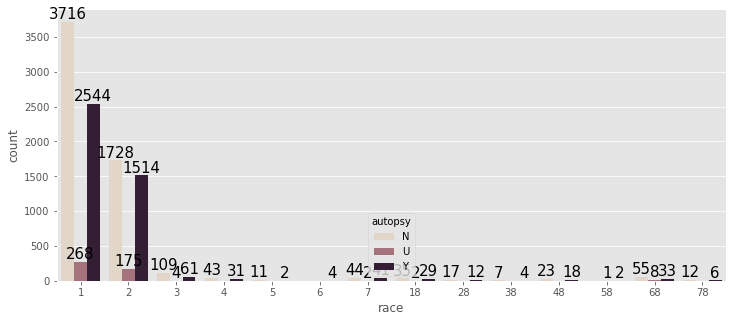

In [191]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(data=df, x='race', hue='autopsy', palette='ch:.25')
ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
ax.bar_label(ax.containers[1], fontsize=15, fmt='%d')
ax.bar_label(ax.containers[2], fontsize=15, fmt='%d');

In [192]:
df.dropna(subset=['educ2003', 'mandeath'], inplace=True)

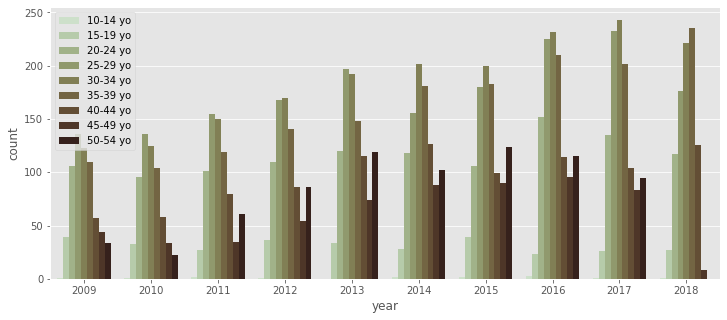

In [196]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(data=t_ff, x='year', hue='ager27', palette='ch:.85')
ax.legend(labels=[v for k, v in ager27_dict.items()]);

In [214]:
# Records for women ages 10 to 54
t_ff = df[df['ager27']<=16]

In [215]:
t_ff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 6 to 10560
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     9070 non-null   int64  
 1   restatus  9070 non-null   int64  
 2   educ2003  9070 non-null   float64
 3   monthdth  9070 non-null   int64  
 4   sex       9070 non-null   object 
 5   ager27    9070 non-null   int64  
 6   placdth   9070 non-null   int64  
 7   marstat   9070 non-null   object 
 8   weekday   9070 non-null   int64  
 9   year      9070 non-null   int64  
 10  injwork   9070 non-null   object 
 11  mandeath  9070 non-null   float64
 12  methdisp  9070 non-null   object 
 13  autopsy   9070 non-null   object 
 14  ucod      9070 non-null   object 
 15  ucr113    9070 non-null   int64  
 16  ranum     9070 non-null   int64  
 17  record_1  9070 non-null   object 
 18  record_2  9070 non-null   object 
 19  record_3  9070 non-null   object 
 20  record_4  9070 non-null   obj

In [218]:
over30 = t_ff[t_ff['ager27']>=12]
over30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5821 entries, 6 to 10559
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     5821 non-null   int64  
 1   restatus  5821 non-null   int64  
 2   educ2003  5821 non-null   float64
 3   monthdth  5821 non-null   int64  
 4   sex       5821 non-null   object 
 5   ager27    5821 non-null   int64  
 6   placdth   5821 non-null   int64  
 7   marstat   5821 non-null   object 
 8   weekday   5821 non-null   int64  
 9   year      5821 non-null   int64  
 10  injwork   5821 non-null   object 
 11  mandeath  5821 non-null   float64
 12  methdisp  5821 non-null   object 
 13  autopsy   5821 non-null   object 
 14  ucod      5821 non-null   object 
 15  ucr113    5821 non-null   int64  
 16  ranum     5821 non-null   int64  
 17  record_1  5821 non-null   object 
 18  record_2  5821 non-null   object 
 19  record_3  5821 non-null   object 
 20  record_4  5821 non-null   obj

In [216]:
t_ff.race = t_ff.race.replace(to_replace=race_dict)

In [217]:
t_ff.race.unique()

array(['White', 'Black', 'Asian', 'NatHaw/OtherPacIsl',
       'AmIndian/AlaskaNative'], dtype=object)

In [219]:
over30.race.unique()

array(['White', 'Black', 'NatHaw/OtherPacIsl', 'AmIndian/AlaskaNative',
       'Asian'], dtype=object)

In [220]:
over30_white = over30[over30['race']=='White']

In [239]:
otw_first5 = over30_white.ucod.value_counts(normalize=True)[:5]

In [222]:
over30_black = over30[over30['race']=='Black']
# over30_black.ucod.value_counts(normalize=True)[:5]
over30_black.record_1.value_counts(normalize=True)[:5]

O268    0.201784
O998    0.098662
O961    0.084169
O960    0.083612
O994    0.057971
Name: record_1, dtype: float64

In [223]:
under30 = t_ff[t_ff['ager27']<=11]

In [224]:
under30_white = under30[under30['race']=='White']
under30_white.ucod.value_counts(normalize=True)[:5]

O268    0.169270
O961    0.122418
O960    0.105290
O998    0.099748
O994    0.069018
Name: ucod, dtype: float64

In [225]:
under30_black = under30[under30['race']=='Black']
under30_black.ucod.value_counts(normalize=True)[:5]

O268    0.166667
O960    0.097148
O961    0.088235
O994    0.081105
O903    0.072193
Name: ucod, dtype: float64

In [228]:
otw1 = over30_white[over30_white['record_1']=='O268']
otw2 = over30_white[over30_white['record_1']=='O998']
otw3 = over30_white[over30_white['record_1']=='O961']
otw4 = over30_white[over30_white['record_1']=='O960']
otw5 = over30_white[over30_white['record_1']=='O994']

In [227]:
otw = pd.DataFrame(columns=['source', 'target', 'value'])
otw

,source,target,value


In [229]:
otw_top1 = otw1.record_2.value_counts(normalize=True)[:5]
for i in range(5): 
    otw = otw.append({'source': 'O268', 'target': otw_top1.index[i], 'value': otw_top1[i]}, ignore_index=True)

In [231]:
otw_top2 = otw2.record_2.value_counts(normalize=True)[:5]
for i in range(5): 
    otw = otw.append({'source': 'O998', 'target': otw_top2.index[i], 'value': otw_top2[i]}, ignore_index=True)

In [232]:
otw_top3 = otw3.record_2.value_counts(normalize=True)[:5]
for i in range(5): 
    otw = otw.append({'source': 'O961', 'target': otw_top3.index[i], 'value': otw_top3[i]}, ignore_index=True)

In [233]:
otw_top4 = otw4.record_2.value_counts(normalize=True)[:5]
for i in range(5): 
    otw = otw.append({'source': 'O960', 'target': otw_top4.index[i], 'value': otw_top4[i]}, ignore_index=True)

In [234]:
otw_top5 = otw5.record_2.value_counts(normalize=True)[:5]
for i in range(5): 
    otw = otw.append({'source': 'O994', 'target': otw_top5.index[i], 'value': otw_top5[i]}, ignore_index=True)

In [235]:
otw

,source,target,value
0,O268,None,0.663501
1,O268,O249,0.023066
2,O268,O266,0.023066
3,O268,O882,0.020353
4,O268,O100,0.017639
5,O998,None,0.589552
6,O998,O994,0.098881
7,O998,O993,0.082090
8,O998,O988,0.057836
9,O998,O995,0.037313


In [ ]:
restat_dict = {1: 'State & County Residence & Occurrence same', 
              2: 'Intrastate Nonresidents; State Same, County Different', 
              3: 'Interstate Nonresidents; State & County Different, both US', 
              4: 'Foreign Residents: State of Occurrence in US, Residence outside US'}

In [199]:
race_dict = {1: 'White', 2: 'Black', 3: 'AmIndian/AlaskaNative', 6: 'NatHaw/OtherPacIsl', 4: 'Asian', 
            5: 'Asian', 7: 'Asian', 18: 'Asian', 28: 'Asian', 38: 'Asian', 
            48: 'Asian', 58: 'NatHaw/OtherPacIsl', 68: 'NatHaw/OtherPacIsl', 
            78: 'NatHaw/OtherPacIsl'}

In [ ]:
educ_dict = {1: '8th Gr or less', 2: '9-12 Gr, No Diploma', 
             3: 'HS Grad or GED Completed', 4: 'Some college credit but no Degree',
             5: 'Associate Degree', 6: 'Bachelors Degree', 7: 'Masters Degree', 
             8: 'Doctoral or Professional Degree', 9: 'Unknown'}

In [ ]:
df.race = df.race.replace(to_replace=race_dict)

In [ ]:
fig, ax = plt.subplots(figsize=(20 , 7))
ax = sns.countplot(data=df, x='educ2003', hue='race', palette='autumn')
ax.set_xticklabels(labels=[v for k, v in educ_dict.items()], rotation=45)
ax.set_title('Maternal Mortality by Level of Education, 2009-2018', fontsize=15)

In [ ]:
rename = {'restatus': 'resident_status', 'educ2003': 'edu_level', 'monthdth': 'month_of_death', 
         'sex': 'gender_assigned_at_birth', 'ager27': 'age_group', 'placdth': 'place_of_death', 
          'marstat': 'marital_status', 'weekday': 'weekday_of_death', 'year': 'year_of_death', 
          'injwork': 'injury_at_work', 'mandeath': 'manner_of_death', 'methdisp': 'method_disposition', 
          'injury': 'place_of_injury', 'ucod': 'icd10_ucod'}

In [ ]:
df.rename(columns=rename, inplace=True)

In [ ]:
df.info()

In [ ]:
df.dropna(subset=['edu_level', 'manner_of_death'], inplace=True)

In [ ]:
df.info()

In [ ]:
df.record_1 = df.record_1.apply(lambda x: x[:3])

In [ ]:
most = df.copy()

In [ ]:
most_1 = most[most['record_1']=='O96']
most_2 = most[most['record_1']=='O26']
most_3 = most[most['record_1']=='O99']
most_4 = most[most['record_1']=='O88']
most_5 = most[most['record_1']=='O90']


In [ ]:
most_2.info()

In [ ]:
top_5_most_1 = most_1.record_2.value_counts(normalize=True)[:5]
top_5_most_1

In [ ]:
top_5_most_1_dict = {'O961': 'Indirect Obstetric Cause', 'R99': 'Other ill-defined and unspecified causes of mortality', 
                    'T509': 'Poisoning by diuretics and other and unspecified drugs, medicaments and biological substances', 
                    'C509': 'Malignant neoplasm of breast', 
                    'T436': 'Poisoning by psychotropic drugs'}

In [ ]:
top_5_most_1.rename(index=top_5_most_1_dict, inplace=True)
top_5_most_1

In [ ]:
top_5_most_2 = most_2.record_2.value_counts(normalize=True)[:5]
top_5_most_2

In [ ]:
top_5_most_2_dict = {'O268': ''}

In [ ]:
top_5 = df.record_1.value_counts(normalize=True)[:5]

In [ ]:
top_5

In [ ]:
top_5.rename(index=preg_dict, inplace=True)
top_5

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(df.record_1)

In [ ]:
fig, ax = plt.subplots(figsize=(20 , 7))
ax = sns.countplot(data=df, x='race', palette='autumn')
ax.bar_label(ax.containers[0], fontsize=15, fmt='%d')
# ax.set_xticklabels(labels=[v for k, v in educ_dict.items()], rotation=45)
ax.set_title('Maternal Mortality by Race, 2009-2018', fontsize=15)

In [ ]:
df.place_of_death.unique()

In [ ]:
place_dict = {1: 'Hospital, Clinic, Med Ctr: Inpatient', 
             2: 'Hospital, Clinic, Med Ctr: Outpatient', 
             3: 'Hospital, Clinic, Med Ctr: DOA', 
             4: 'Descedent\'s Home', 
             5: 'Hospice', 
             6: 'Nursing Home, Long-Term Care', 
             7: 'Other', 
             9: 'Place of Death Unknown'}

In [ ]:
place_plot = df.groupby(['place_of_death', 'race']).size().reset_index().pivot(columns='race', index='place_of_death', values=0)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
place_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(labels=[v for k, v in place_dict.items()], rotation=30)
ax.set_title('Maternal Mortality by Place of Death, 2009-2018', fontsize=15)